# Exploring Health Records

This notebook explores a dataset generated by a previous project. For context, visit https://github.com/amcgaha/coding-health-records/blob/main/README.md.

1. Import and process dataset
2. Develop plotting functions
3. Explore Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load and Process Data
First, load data and specify which columns to use.

In [2]:
columns = ['patient_id', 'report_year', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
        'summer_day_id', 'session_id', 'weekday', 'day_type', 'session_day']

full_df = pd.read_csv('C:\\Users\\avery\\OneDrive\\wave_visuals\\health_dataset_full.csv', usecols=columns)

print(full_df.columns)

Index(['patient_id', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
       'report_year', 'summer_day_id', 'session_id', 'weekday', 'day_type',
       'session_day'],
      dtype='object')


In this and future analyses, we want to easily look at not only single symptoms (for example, fevers or cuts) but also collections of symptoms, like injuries or cold/flu symptoms. 

The first thing we should do in the data processing phase is to create these "buckets" of symptoms by creating a dictionary.

In [3]:
bucket_dict = {'one_cold_flu': ['congestion', 'respiratory', 'headache', 'fever', 'cough', 'cold', 'fatigue'],
               'two_cold_flu': ['congestion', 'respiratory', 'headache', 'fever', 'cough', 'cold', 'fatigue'],
               'gi_issues': ['stomach_ache', 'nausea', 'bm', 'diarrhea', 'abdominal_pain'],
               'injury': ['wound', 'rolled_ankle', 'fracture', 'swelling', 'cut', 'splinter', 'burn', 'bruise', 'abrasion', 'hit'],
               'allergic': ['allergy', 'hives', 'rash', 'itch', 'anaphylaxis', 'grass'],
               'entropy': ['fatigue', 'blister'],
               'mental_health': ['anxiety', 'homesick'],
               'random': ['menstrual', 'nosebleed'],
               'bugs_any': ['bug_bite', 'tick', 'sting', 'lice']
              }

Create a function that generates buckets as new columns from exisiting collections of columns.

In [4]:
def create_bucket(dataframe, dictionary, key, sum_count):
    """Sums all Trues from a collection of columns, located from a dictionary, and creates a new column with the sum count."""
    
    # initialize new column
    dataframe[key] = False
    
    # state list of columns in bucket, from dictionary value
    column_list = dictionary[key]
    
    # sum all trues across selected columns and subset rows that have a specified number of Trues
    condition = dataframe.loc[:, column_list].sum(axis=1) >= sum_count
    
    # set bucket value (new column) to True where meets above condition
    dataframe.loc[condition, key] = True

Apply ```create_bucket``` function to each key in the ```bucket_dict```, setting the count kwarg to 2 for only the ```'two_cold_flu'``` bucket. 

In [5]:
for key in bucket_dict:
    
    if key == 'two_cold_flu':
        count = 2
        create_bucket(full_df, bucket_dict, key, count)
    
    else:
        count = 1
        create_bucket(full_df, bucket_dict, key, count)

Verify that the buckets were created correctly.

In [6]:
print(full_df['two_cold_flu'].sum())
print(full_df['one_cold_flu'].sum())

366
1735


In [7]:
print(full_df.columns)

Index(['patient_id', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
       'report_year', 'summer_day_id', 'session_id', 'weekday', 'day_type',
       'session_day', 'one_cold_flu', 'two_cold_flu', 'gi_issues', 'injury',
       'allergic', 'entropy', 'mental_health', 'random', 'bugs_any'],
      dtype='object')


Create separate dataframes for camper and staff only records.

In [8]:
camper_df = full_df[full_df['is_camper'] == True]
print(camper_df.shape)

staff_df = full_df[full_df['is_camper'] == False]
print(staff_df.shape)

(3097, 70)
(692, 70)


Store all three in a dictionary to loop over later.

In [9]:
df_dict = {'all': full_df,
           'staff': staff_df, 
           'campers': camper_df}

Define a function that groups dataframe by ```'session_day_id'```, applies ```functions``` to aggregate data, and then fill in missing days.

In [10]:
def prepare_by_day(dataframe, cols_to_group, function_dict):
    """creates a groupby object, turns it into a dataframe, then merges with another dataframe to fill missing day values"""
    
    # create groupby object using specified columns and function dictionary
    grouped = dataframe.groupby(cols_to_group).agg(function_dict)
    
    # turn groupby object into dataframe and fill na values with 0
    grouped_df = pd.DataFrame(grouped).fillna(0).reset_index()
    
    # generate day list, dictionary, then dataframe
    day_list = [day for day in range(1, 75)]
    day_dict = dict.fromkeys(grouped.columns, 0)
    day_df = pd.DataFrame(day_dict, index=day_list)
    day_df['summer_day_id'] = day_df.index
    day_df_selected = day_df[['summer_day_id']]
    
    # merge
    joined_df = grouped_df.merge(day_df_selected, on='summer_day_id', how='outer').fillna(0)
    
    # return output
    return joined_df.sort_values('summer_day_id')


Define a function that groups dataframe by ```'session_id'``` and applies ```functions``` to aggregate data. 

In [11]:
def prepare_by_session(dataframe, function_dict):
    
    grouped = dataframe.groupby(['report_year', 'session_id']).agg(function_dict)
    
    # turn groupby object into dataframe and fill na values with 0
    grouped_df = pd.DataFrame(grouped).fillna(0).reset_index()
    
    return grouped_df

Create the ```functions``` dictionary used in the above functions. 

In [12]:
# create dictionary of functions. In this case, we will want to find the sum of *almost* every column.    
function_string = 'sum'
functions = dict.fromkeys(full_df.columns, function_string)

# We don't want to sum 'patient_id', which is a primary key for a database and not a meaningful number. 
# Instead, we want to 'count' this field. Replace 'sum' with 'count' for 'patient_id'
functions['patient_id'] = 'count'

# create a list of items we don't want to apply functions to
no_func_list = ['summer_day_id', 'report_year', 'session_id', 'weekday', 'day_type', 'session_day']

# delete each item in the group_list from agg function
for item in no_func_list:
    del functions[item]
    
# check output
print(functions)

{'patient_id': 'count', 'is_camper': 'sum', 'home_notified': 'sum', 'abdominal_pain': 'sum', 'abrasion': 'sum', 'allergy': 'sum', 'anaphylaxis': 'sum', 'blister': 'sum', 'bm': 'sum', 'bruise': 'sum', 'bug_bite': 'sum', 'congestion': 'sum', 'cut': 'sum', 'diarrhea': 'sum', 'fatigue': 'sum', 'fever': 'sum', 'headache': 'sum', 'hives': 'sum', 'homesick': 'sum', 'itch': 'sum', 'menstrual': 'sum', 'mono': 'sum', 'nausea': 'sum', 'respiratory': 'sum', 'sore_throat': 'sum', 'splinter': 'sum', 'sting': 'sum', 'stomach_ache': 'sum', 'sun_burn': 'sum', 'tick': 'sum', 'rolled_ankle': 'sum', 'vomiting': 'sum', 'wound': 'sum', 'poison_ivy': 'sum', 'swelling': 'sum', 'rash': 'sum', 'cough': 'sum', 'asthma': 'sum', 'fracture': 'sum', 'burn': 'sum', 'cold': 'sum', 'nosebleed': 'sum', 'toe': 'sum', 'bike': 'sum', 'predator': 'sum', 'capture': 'sum', 'hike': 'sum', 'hit': 'sum', 'campout': 'sum', 'anxiety': 'sum', 'lice': 'sum', 'grass': 'sum', 'eye': 'sum', 'sleep': 'sum', 'sum_true': 'sum', 'one_cold_

Now it's time to use the functions. We'll loop over a dictionary of dataframes to make this efficient.

First, apply the ```prepare_by_day()``` function on each value in the dictionary of dataframes, storing each result as a value in a new dictionary, ```prepared_day_dict```.

In [13]:
# initialize dictionary
prepared_day_dict = {}

# apply prepare_by_day function for each item in the original dictionary of dataframes, called df_dict
for key in df_dict:
    prepared_day_dict[key] = prepare_by_day(df_dict[key], ['summer_day_id'], functions)

# check output keys
print(prepared_day_dict.keys())

dict_keys(['all', 'staff', 'campers'])


Repeat this process using the ```prepare_by_session()``` function, storing results in ```session_dict```. 

In [14]:
# initialize new dataframe
session_dict = {}

# apply prepare_by_session function for each item in the original dictionary of dataframes, called df_dict
for key in df_dict:
    session_dict[key] = prepare_by_session(df_dict[key], functions)

# check output keys
print(session_dict.keys())    

dict_keys(['all', 'staff', 'campers'])


## 2. Define Plotting Functions

Define a function to plot categories by session.

In [15]:
def session_plot(dataframe_str, category_str, agg_func):
    """Plots sum or proportion of all visits by session that match a chosen category"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = session_dict[dataframe_str]
    
    # Create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat'] = selected_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat'] = (selected_df[category_str] / (selected_df['patient_id'])) * 100
       
    # Create plot and specify order
    category_order = ['staff_training', 'session_1', 'session_2', 'session_3', 'session_4', 'session_5']
    ax = sns.catplot('session_id', 'temp_cat', data=selected_df, kind='box', order=category_order, palette='Set2', aspect=2)

    # Write title text
    title_text = f'{category_str} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='Camp Session')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)
    
    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['session_id', 'temp_cat']].rename({'temp_cat': f'{category_str}'}, axis=1).groupby('session_id').describe(), 2))

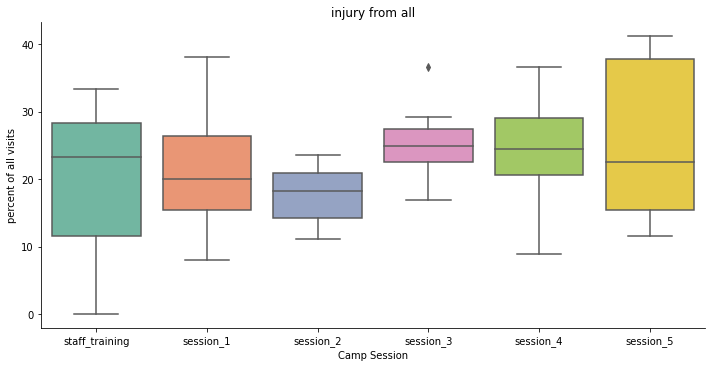

               injury                                                 
                count   mean    std    min    25%    50%    75%    max
session_id                                                            
session_1         7.0  21.40   9.89   8.00  15.48  20.00  26.39  38.10
session_2         7.0  17.60   4.60  11.11  14.28  18.18  20.90  23.53
session_3         7.0  25.45   6.23  16.90  22.55  24.88  27.36  36.56
session_4         7.0  24.20   8.94   8.97  20.63  24.48  29.03  36.60
session_5         7.0  25.98  12.69  11.54  15.48  22.50  37.86  41.18
staff_training    3.0  18.86  17.10   0.00  11.63  23.26  28.29  33.33


In [16]:
session_plot('all', 'injury', 'percent')

Define a function that builds plots by ```'summer_day_id```.

In [17]:
def day_plot(dataframe_str, category_str, agg_func):
    
    """Plots sum or proportion of all visits each day that match a chosen category"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = prepared_day_dict[dataframe_str]
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat'] = selected_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat'] = (selected_df[category_str] / (selected_df['patient_id'])) * 100
        
    # Create main scatter plot on ax object
    ax = sns.relplot('summer_day_id', 'temp_cat', data=selected_df, kind='scatter', color='lightskyblue', aspect=3)
    
    # Configure and plot rolling average
    selected_df['rolling_avg'] = selected_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=selected_df)
    
    # Write title text
    title_text = f'{category_str} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)

    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if selected_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
    else:
        pass

    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['temp_cat', 'gi_issues', 'injury', 'bugs_any']].rename({'temp_cat': f'{category_str}'}, axis=1).describe(), 2))    

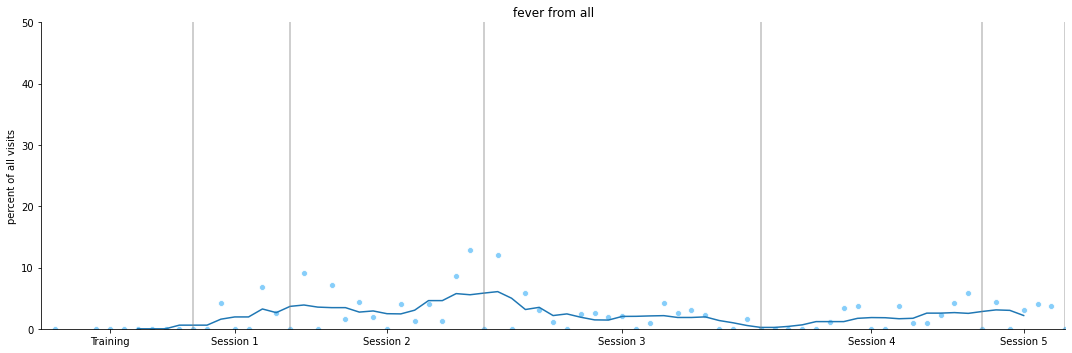

       fever  gi_issues  injury  bugs_any
count  72.00      74.00   74.00     74.00
mean    2.18      10.72   12.03     10.26
std     2.84       9.11   10.73      8.44
min     0.00       0.00    0.00      0.00
25%     0.00       3.00    2.25      3.00
50%     1.23       8.50    9.00      8.00
75%     3.70      16.75   18.75     17.00
max    12.90      36.00   35.00     28.00


In [18]:
day_plot('all', 'fever', 'percent')

Define a similar function that plots both ```'campers'``` and ```'staff'``` on the same plot.

In [19]:
def day_plot_double(category_str, agg_func):
    
    """Plots sum or proportion of all visits each day that match a chosen category, both campers and staff on same plot"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    camper_df = prepared_day_dict['campers']
    staff_df = prepared_day_dict['staff']
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        camper_df['temp_cat'] = camper_df[category_str]
        staff_df['temp_cat'] = staff_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        camper_df['temp_cat'] = (camper_df[category_str] / (camper_df['patient_id'])) * 100
        staff_df['temp_cat'] = (staff_df[category_str] / (staff_df['patient_id'])) * 100
        
    # Create main scatter plot on ax object
    ax = sns.relplot('summer_day_id', 'temp_cat', data=camper_df, kind='scatter', color='lightskyblue', aspect=3)
    
    # Add secondary scatter plot
    sns.scatterplot('summer_day_id', 'temp_cat', data=staff_df, color='lightgreen')
        
    # Configure and plot rolling averages
    camper_df['rolling_avg'] = camper_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=camper_df, color='blue')
    
    staff_df['rolling_avg'] = staff_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=staff_df, color='green')
    
    # Write title text
    title_text = f'{category_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)

    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if camper_df['temp_cat'].max() <= 50 and staff_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
            
    plt.show()    
    
    # show descriptive statistics
    camper_object = round(camper_df['temp_cat'].rename({'temp_cat': f'camper {category_str}'}, axis=1).describe(), 2)
    staff_object = round(staff_df['temp_cat'].rename({'temp_cat': f'staff {category_str}'}, axis=1).describe(), 2)
    
    description_df = pd.DataFrame()
    description_df['campers'] = camper_object
    description_df['staff'] = staff_object
    description_df['diff'] = description_df['campers'] - description_df['staff']
    
    print(description_df)

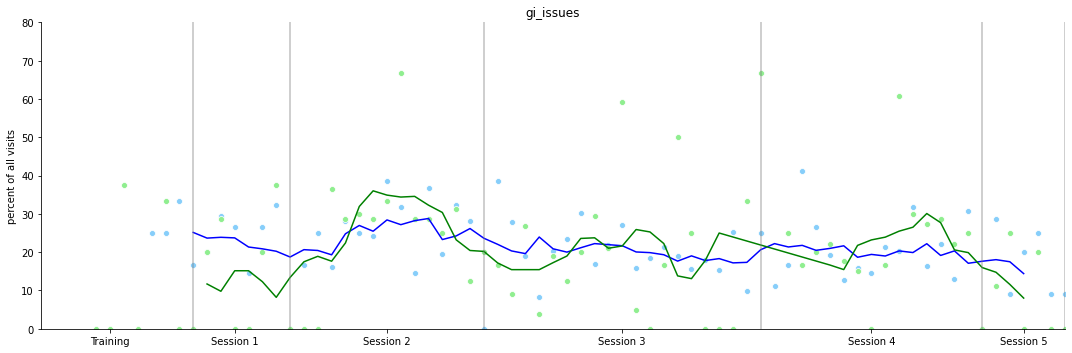

       campers   staff   diff
count    67.00   70.00  -3.00
mean     21.16   20.63   0.53
std       8.95   19.34 -10.39
min       0.00    0.00   0.00
25%      15.85    0.00  15.85
50%      20.29   20.00   0.29
75%      26.85   28.57  -1.72
max      41.18  100.00 -58.82


In [20]:
day_plot_double('gi_issues', 'percent')

Finally, define two functions to quickly generate three plots corresponding to ```'all'```, ```'campers'```, and ```'staff'```.

In [21]:
def day_plot_all(category, agg_func):
    for key in prepared_day_dict:
        day_plot(key, category, agg_func)
        
def session_plot_all(category, agg_func):
    for key in session_dict:
        session_plot(key, category, agg_func)

## 3. Explore Data

Let's first take a look at the data as a whole. The first plot will show all visits by session. The boxes show statistical reference points in each session's data, which includes the number of visits each year from 2013-2019.

To plot by session, use the ```session_plot()``` function, setting the ```agg_func``` argument to ```'sum'```  and the category to ```'patient_id'```, which will return the sum of ```'all'``` visits each session.

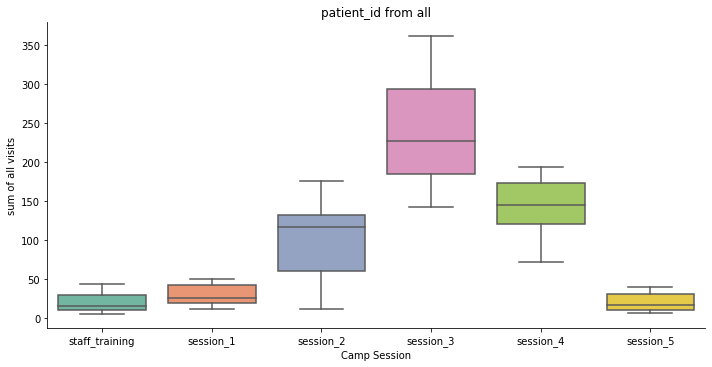

               patient_id                                                  
                    count    mean    std    min    25%    50%    75%    max
session_id                                                                 
session_1             7.0   29.86  15.40   12.0   18.5   25.0   42.5   50.0
session_2             7.0   98.43  58.57   11.0   60.5  117.0  132.0  176.0
session_3             7.0  241.00  78.60  142.0  185.0  227.0  293.5  361.0
session_4             7.0  142.29  43.67   72.0  120.0  145.0  172.5  194.0
session_5             7.0   20.71  13.34    6.0   10.5   17.0   30.5   40.0
staff_training        3.0   21.00  19.70    5.0   10.0   15.0   29.0   43.0


In [22]:
session_plot('all', 'patient_id', 'sum')

### Session Length Matters
One observation is immediately clear: Session 3 has the most visits, followed by a kind of tie between Session 2 and 4. This makes sense because of our camp's summer schedule. __Session 3 is the longest session__, at three weeks, while Sessions 2 and 4 are two-week sessions. Session 1 and 5 are one-week sessions. It makes sense that the shorter sessions have fewer visits to the health center.

Also visible is a difference between Session 2 and 4. Both the spread of values and the mean shows a large difference, with Session 2 showing 98 visits on average while Session 4 shows 142 on average. The reason for this difference is unclear. One possibility is a real increase in ailments over time, as conditions evolve throughout the summer. This will need to be explored in finer detail.

Staff training has the lowest visit numbers of all, and that also makes sense. There are only about 65 staff present during this time -- and zero campers. It is also common for no medical staff to be present for the first few days of training, resulting in very few visits recorded.

Let's plot the data for staff in particular. What can we see?

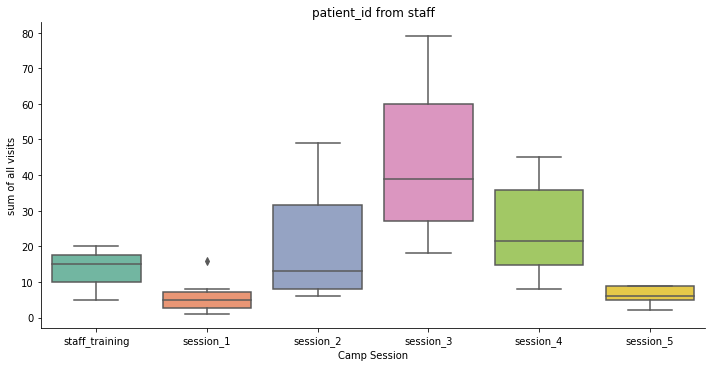

               patient_id                                              
                    count   mean    std   min    25%   50%    75%   max
session_id                                                             
session_1             6.0   6.17   5.42   1.0   2.75   5.0   7.25  16.0
session_2             6.0  20.83  17.78   6.0   8.00  13.0  31.50  49.0
session_3             7.0  44.29  23.13  18.0  27.00  39.0  60.00  79.0
session_4             6.0  24.83  14.63   8.0  14.75  21.5  35.75  45.0
session_5             5.0   6.20   2.95   2.0   5.00   6.0   9.00   9.0
staff_training        3.0  13.33   7.64   5.0  10.00  15.0  17.50  20.0


In [23]:
session_plot('staff', 'patient_id', 'sum')

### For Staff, Training is not the Lowest

When we look at staff, we can see a similar pattern to the rest of the data. The main difference is that staff training jumps three ranks, above both one week sessions, in terms of average number of visits. This pattern is interesting. Why do staff visit the health center more during training -- when medical staff may not even be present, resulting in underreporting -- than both one week sessions combined?

We will need to dig into specific categories to search for explanations. Before we move on, however, let's take a look at the entire dataset on a finer resolution. Let's call ```day_plot_double()``` to show camper and staff total visits by day of the summer. 

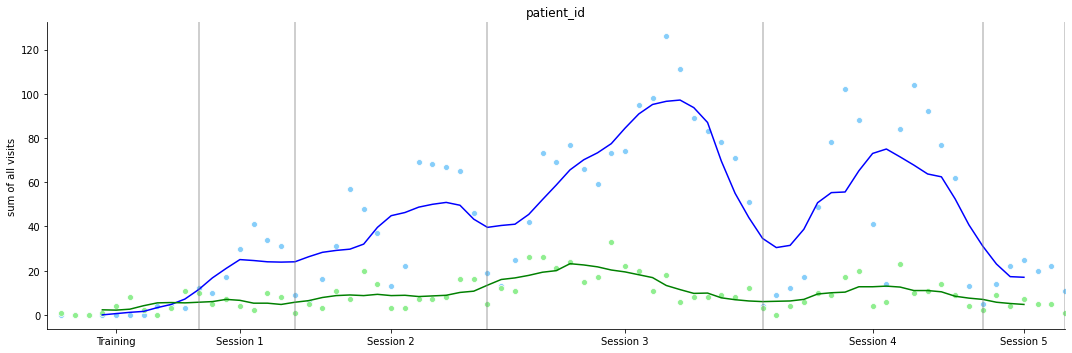

       campers  staff   diff
count    74.00  74.00   0.00
mean     41.85   9.35  32.50
std      34.20   7.28  26.92
min       0.00   0.00   0.00
25%      12.25   4.00   8.25
50%      32.50   8.00  24.50
75%      70.50  12.00  58.50
max     126.00  33.00  93.00


In [24]:
day_plot_double('patient_id', 'sum')

# Lines show a seven-day rolling average

### Four Waves of Camper Visits
Staff visits begin steady, with about 5-10 visits recorded on each camp day across all years in the past. They rise through Session 2 and partway through 3, ending in a peak of 33 visits recorded. Visits decline for the most part after that, except for a modest increase in the middle of Session 4. 

The overall impression -- at least at this scale -- is of a steady stream of visits throughout the summer.

Camper visits, on the other hand, show four distinct phases, or "waves", corresponding to the middle of each session. 

For context, it's important to note that during Sessions 2, 3, and 4, all campers go on a two-night backpacking trip. The trips fall in the middle of the session. As the data shows, these trips tend to align with higher visits to the health hut -- both before and after. These sessions are also longer, giving campers more time to develop all kinds of ailments like bug bites, injuries, or communicable diseases. We will explore these categories specifically in future explorations.


### Focus on Cold & Flu
The main question motivating this study is: What has the distribition of cold and flu symptoms been like since 2013? And has it differed between staff and campers?

To begin to tackle these questions, we need to change the ```agg_func``` we're using from ```'sum'``` to ```'percent'```. This will show how each category changes relative to the overall number of visits. Using the percent of visits, whether by session or by each day, controls for the fact that overall visits tend to rise in certain times across the board.

Now, let's plot cold and flu symptoms. There are many ways to capture cold and flu symptoms, including targeting specific symptoms, like congestion, that might be representative. Another approach could be to cast a wide net and include any symptoms. This study takes a middle path. We use the column ```'two_cold_flu'```, which becomes True in the column if a visit shows at least two cold or flu symptoms. In the plot, we will see the aggregate of Trues for this category. The benefit of using this method is that it is both inclusive, capturing a range of respiratory illnesses, and specific, by ensuring we aren't looking at just headaches. We can think of this category as __Likely Infections__. 

The symptoms included are:

* Cough
* Shortness of breath or chest discomfort
* Fever or chills
* Headache
* Sore Throat
* Congestion
* Fatigue, feeling tired, body aches

To learn more visit: https://github.com/amcgaha/coding-health-records/blob/main/README.md#cold--flu-symptom-subset



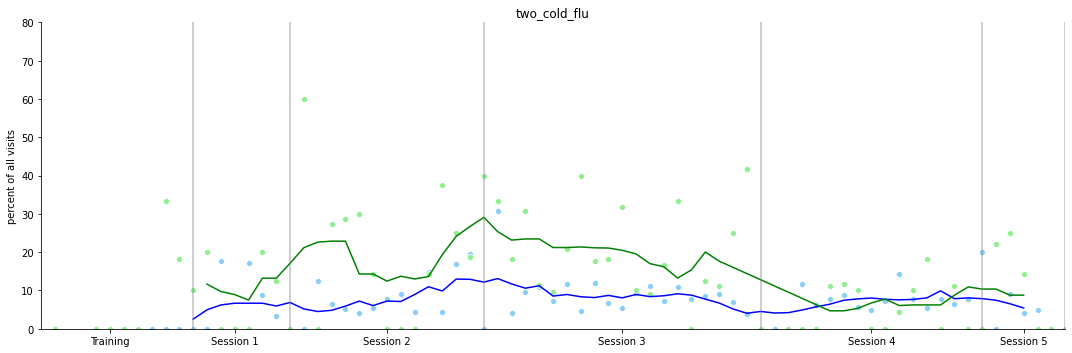

       campers  staff   diff
count    67.00  70.00  -3.00
mean      7.08  13.41  -6.33
std       5.94  13.79  -7.85
min       0.00   0.00   0.00
25%       3.96   0.00   3.96
50%       6.85  11.11  -4.26
75%       9.28  20.62 -11.34
max      30.77  60.00 -29.23


In [26]:
day_plot_double('two_cold_flu', 'percent')

### Do Staff Show More Infections? 

Right away, we can see that staff (green) likely infections are almost always a higher percent of visits than campers (blue). That's true for almost the entire summer, except for a handful of days in Session 4. 

With all days combined, 13.41 percent of health center visits from staff respresent likely infections. Campers tend to have about half of that, at 7.08 percent. This difference is only observed when looking at the percent of visits by staff or campers. In raw counts, campers always have more visits because there are 50 percent more campers than staff.

Staff percent of visits also had more variation year to year -- more than twice as much. The standard deviation is 13.79 for staff, and 5.94 for campers. 

One interpretation for these data is that we are simply observing a form of response bias. Staff may not report to the health center to receive a bandaid, like campers do. Rather, they only report when they need some specific medication, like a decongestant, which they are not allowed to keep in their cabins. It could be that staff get sick at the same rates as campers, but simply report their other ailments less. 

It is handy that we have information on all types of visits at our disposal. Let's check the response bias theory against some data. 

Here are plots for ```'injury'``` , ```'gi_issues'``` (gastrointestinal issues), and ```'headache'```. These categories could offer some insight. If staff have significantly lower average percent than campers, we might have evidence of a response bias.

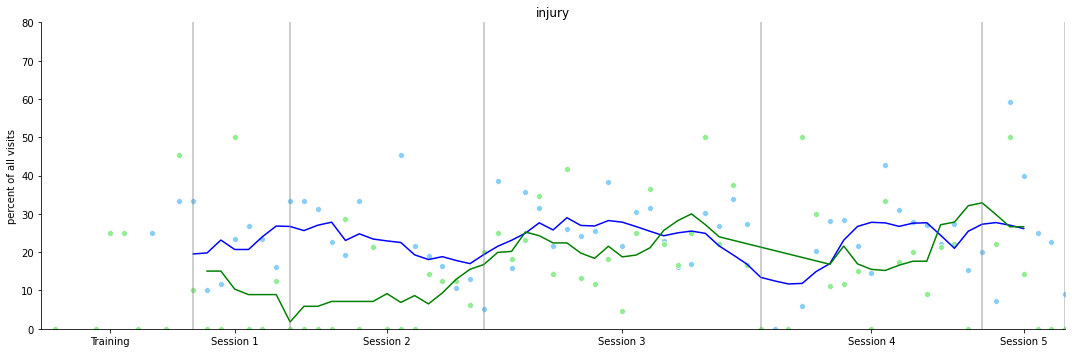

       campers   staff   diff
count    67.00   70.00  -3.00
mean     23.01   16.68   6.33
std      11.68   17.89  -6.21
min       0.00    0.00   0.00
25%      16.17    0.00  16.17
50%      23.33   14.29   9.04
75%      30.74   24.52   6.22
max      59.09  100.00 -40.91


In [37]:
day_plot_double('injury', 'percent')

### After Training, Staff Injuries Remain Low Until Session 3

At first, ```'injury'``` looks suspicious. Staff begin the summer with a far lower proportion of visits that reflect injuries. However, we can see that during Staff Training, injuries make up between 25 - 50 percent of visits on some days, before the seven-day average kicks in. About one week into camp proper, injury reports for staff fall to almost 0 percent of staff visits. After a few weeks at a low level, staff proprotion of injuries climbs to match campers, at about 30 percent. It remains close to campers for the remainder of the summer. Overall, camper visits do account for about 6 percent more of their total visits than staff.

There may be something interesting to be said about the period where injuries are lower for staff. For example, it could be that other issues come up more for staff in the beginning -- like cold and flu symptoms! Let's hold onto that for the moment. We don't yet see evidence of a response bias across the board.

Let's check another category: bug bites.

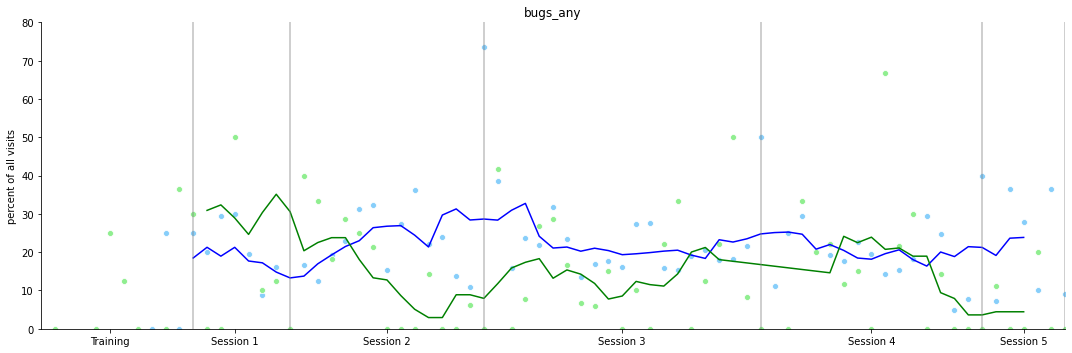

       campers   staff   diff
count    67.00   70.00  -3.00
mean     21.38   14.82   6.56
std      11.65   18.39  -6.74
min       0.00    0.00   0.00
25%      15.43    0.00  15.43
50%      19.51   10.56   8.95
75%      27.32   22.22   5.10
max      73.68  100.00 -26.32


In [38]:
day_plot_double('bugs_any', 'percent')

### Staff Bug Bites Start High, Then Plummet In Session 2

This category includes any type of bug bites, including mosquitos, ticks, or spiders. Overall, the average percent of visits is higher for campers on average by about 6 percent. Staff clearly experience a lower proportion of bug bite visits across one chunk of time. It begins about four weeks into the summer, and it lasts for about four weeks. 



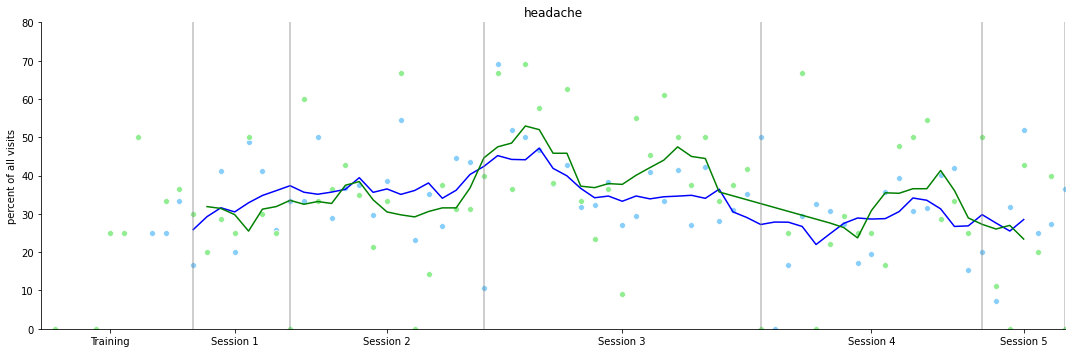

       campers  staff  diff
count    67.00  70.00 -3.00
mean     33.11  33.13 -0.02
std      11.98  18.22 -6.24
min       0.00   0.00  0.00
25%      26.92  25.00  1.92
50%      32.65  33.33 -0.68
75%      41.00  44.81 -3.81
max      69.23  69.23  0.00


In [33]:
day_plot_double('headache', 'percent')

#### Injuries are low, then bugs are low. These correspond with peaks in the cold flu. Instead of response bias, what I think we're getting is jumps in respiratory infections. These are bad early on, then subside after a peak in Session 3.

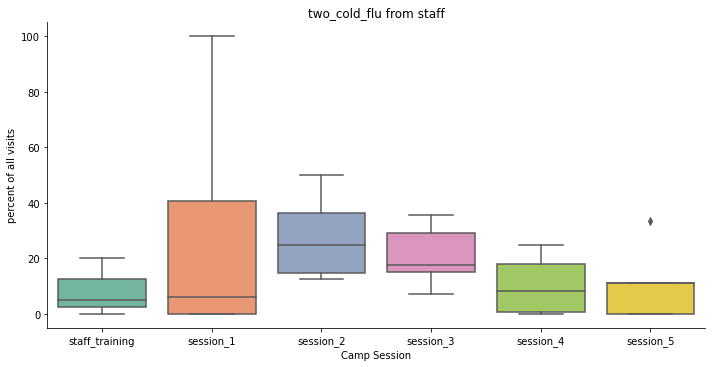

               two_cold_flu                                                  
                      count   mean    std    min    25%    50%    75%     max
session_id                                                                   
session_1               6.0  27.08  40.63   0.00   0.00   6.25  40.62  100.00
session_2               6.0  27.38  15.21  12.50  14.88  25.00  36.46   50.00
session_3               7.0  21.25  10.19   7.25  15.11  17.65  29.08   35.48
session_4               6.0  10.12  10.85   0.00   0.56   8.25  17.99   25.00
session_5               5.0  11.11  13.61   0.00   0.00  11.11  11.11   33.33
staff_training          3.0   8.33  10.41   0.00   2.50   5.00  12.50   20.00


In [39]:
session_plot('staff', 'two_cold_flu', 'percent')